First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

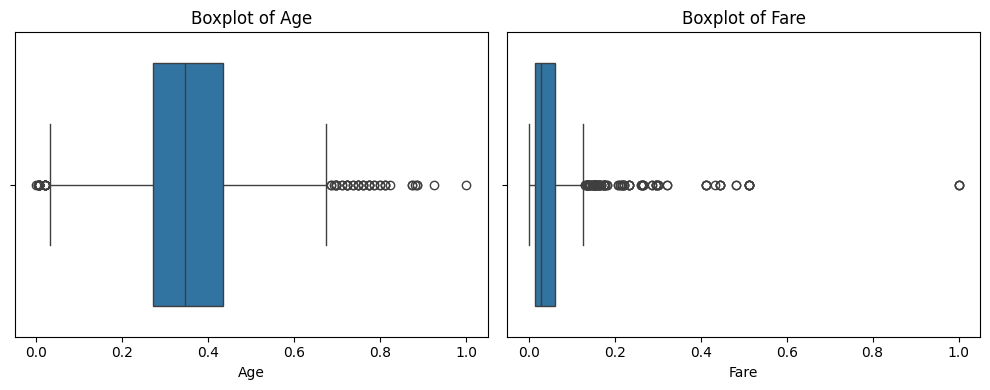


Cleaned Data Sample:
    PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0  0.271174      1      0   
2                        Heikkinen, Miss. Laina    1  0.321438      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.434531      1      0   
4                      Allen, Mr. William Henry    0  0.434531      0      0   
5                              Moran, Mr. James    0  0.346569      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  
0         A/5 21171  0.014151       False        True  
2  STON/O2. 3101282  0.015469       False        True  
3            113803  0.103644       False        True  
4            373450  0.015713       False        True  

In [4]:
# Task 1: Data Cleaning & Preprocessing
# Dataset: Titanic Dataset

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 3: Explore Basic Info
print("First 5 rows:\n", df.head())
print("\nDataset Info:")
df.info()
print("\nMissing values:\n", df.isnull().sum())

# Step 4: Handle Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'])  # Too many missing values

# Step 5: Encode Categorical Variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Step 6: Feature Scaling (Normalization)
numeric_features = ['Age', 'Fare']
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Step 7: Outlier Detection and Removal (Boxplots)
plt.figure(figsize=(10, 4))
for i, col in enumerate(numeric_features):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Optional: Remove outliers using IQR
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Step 8: Final Dataset Preview
print("\nCleaned Data Sample:\n", df.head())

# Step 9: Save to CSV (optional)
df.to_csv("cleaned_titanic.csv", index=False)
print("\nPreprocessing Complete. Cleaned dataset saved.")
